In [162]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#multiple linear regression
from sklearn import linear_model

#for penalized linear model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#default fig size
plt.rcParams['figure.figsize'] = [10, 5]






In [163]:
#load data
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")


In [164]:
#check for na values
train_data_isna = train_data.isna().sum()/len(train_data)*100
train_data_isna[train_data_isna>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Based on this, I will not use PoolQC, MiscFeature, Alley,Fence,FireplaceQua,LotFrontage.

In [165]:
train_corr = train_data.corr()
train_corr[abs(train_corr)>0.7]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Found the following correlations greater that +/- 0.7:
<br>GarageYrBlt v YearBlt = 0.825
<br>SalePrice v OverallQual=0.790982
<br>SalePrice v GrLivArea = 0.709

<p>Makes sense that year built and garage year built are correlated. Therefore, I will not use garage year built.</p>


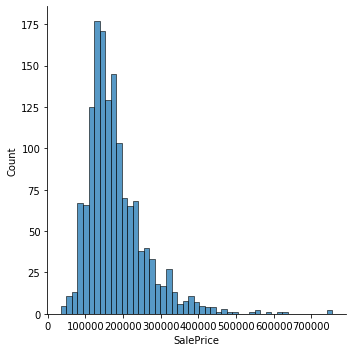

In [166]:
#Plot the histogram of SalePrice
sns.displot(train_data, x ='SalePrice')

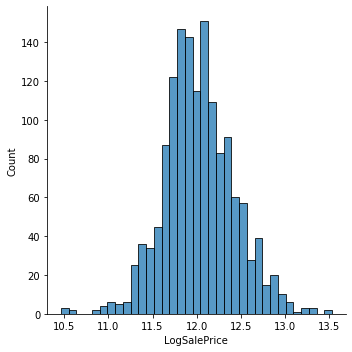

In [167]:
train_data['LogSalePrice']=[math.log(x)for x in train_data['SalePrice']]
sns.displot(train_data, x ='LogSalePrice')

#natural log transformation

In [168]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt'],inplace=True,axis=1)



In [169]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [170]:
train_dummified = pd.get_dummies(train_data, drop_first=True)
train_dummified

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [171]:
for col in train_data:
    print(col)
    print(train_data[col].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]

Based on this, the columns I would like to one-hot encode are listed in nominal_cols variable.

In [172]:
nominal_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
train_data_nominal_dummies = pd.get_dummies(train_data[nominal_cols],drop_first=True)
train_data.drop(nominal_cols,inplace=True,axis=1)
train_data = train_data.join(train_data_nominal_dummies)
train_data.dropna(inplace=True)

In [173]:
train_data_x = train_data.drop(['LogSalePrice','SalePrice'], axis=1)
train_data_y = train_data['LogSalePrice']
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.2, random_state = 42)

# OLS Fitting

Kaggle provides train and test data. However, their test data doesn't have sale price. So I will be doing a train/test split on just the train data.

In [174]:
linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

#Predictions
train_predict = ols.predict(X_train)
test_predict = ols.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test


In [175]:
ols_train_score = ols.score(X_train, y_train)
ols_test_score = ols.score(X_test, y_test)

print("train score:",ols_train_score)
print("train RSS:",np.sum(train_res)**2)
print("test score:",ols_test_score)
print("test RSS:",np.sum(test_res)**2)


train score: 0.9440005826017565
train RSS: 5.682840365241817e-24
test score: 0.7289562293083478
test RSS: 0.40650563749093055


train std: 0.09403083493748353
train mean: 2.0532910236650613e-15


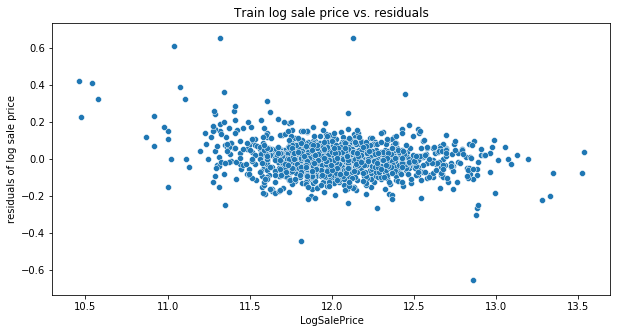

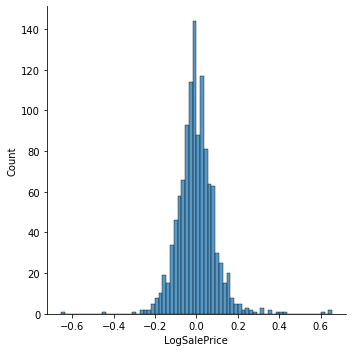

In [176]:
plt.ylabel("residuals of log sale price")
plt.title("Train log sale price vs. residuals")
sns.scatterplot(x=y_train, y = train_res)
sns.displot(train_res)
print("train std:",train_res.std())
print("train mean:",train_res.mean())


test std: 0.21235453311069302
test mean: -0.002190989505869737


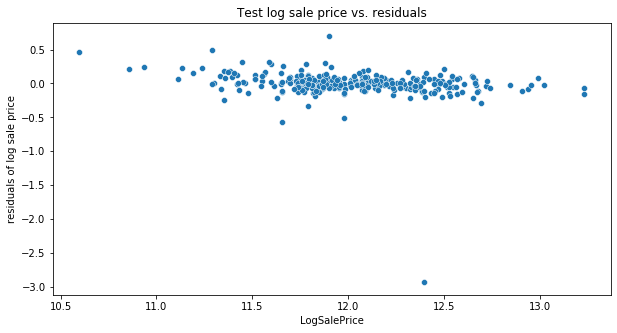

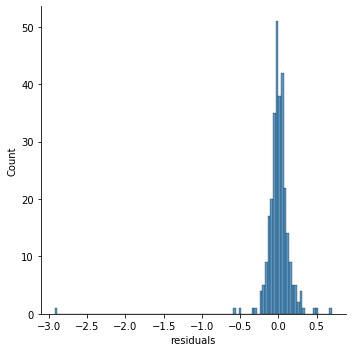

In [177]:
#test case stats
plt.ylabel("residuals of log sale price")
plt.title("Test log sale price vs. residuals")
sns.scatterplot(x=y_test, y = test_res)
g=sns.displot(test_res)
g.set_axis_labels("residuals")
print("test std:",test_res.std())
print("test mean:",test_res.mean())


In [178]:
test_res[abs(test_res)>1]

271   -2.925339
Name: LogSalePrice, dtype: float64

Train score is significantly higher than test score. The error is the test is driven by a few outliers. These are all signs of over-fitting.

In [179]:
len(ols.coef_)

236

In [180]:
len(X_train.columns)

236

In [181]:
ols.intercept_

6.746431017606558

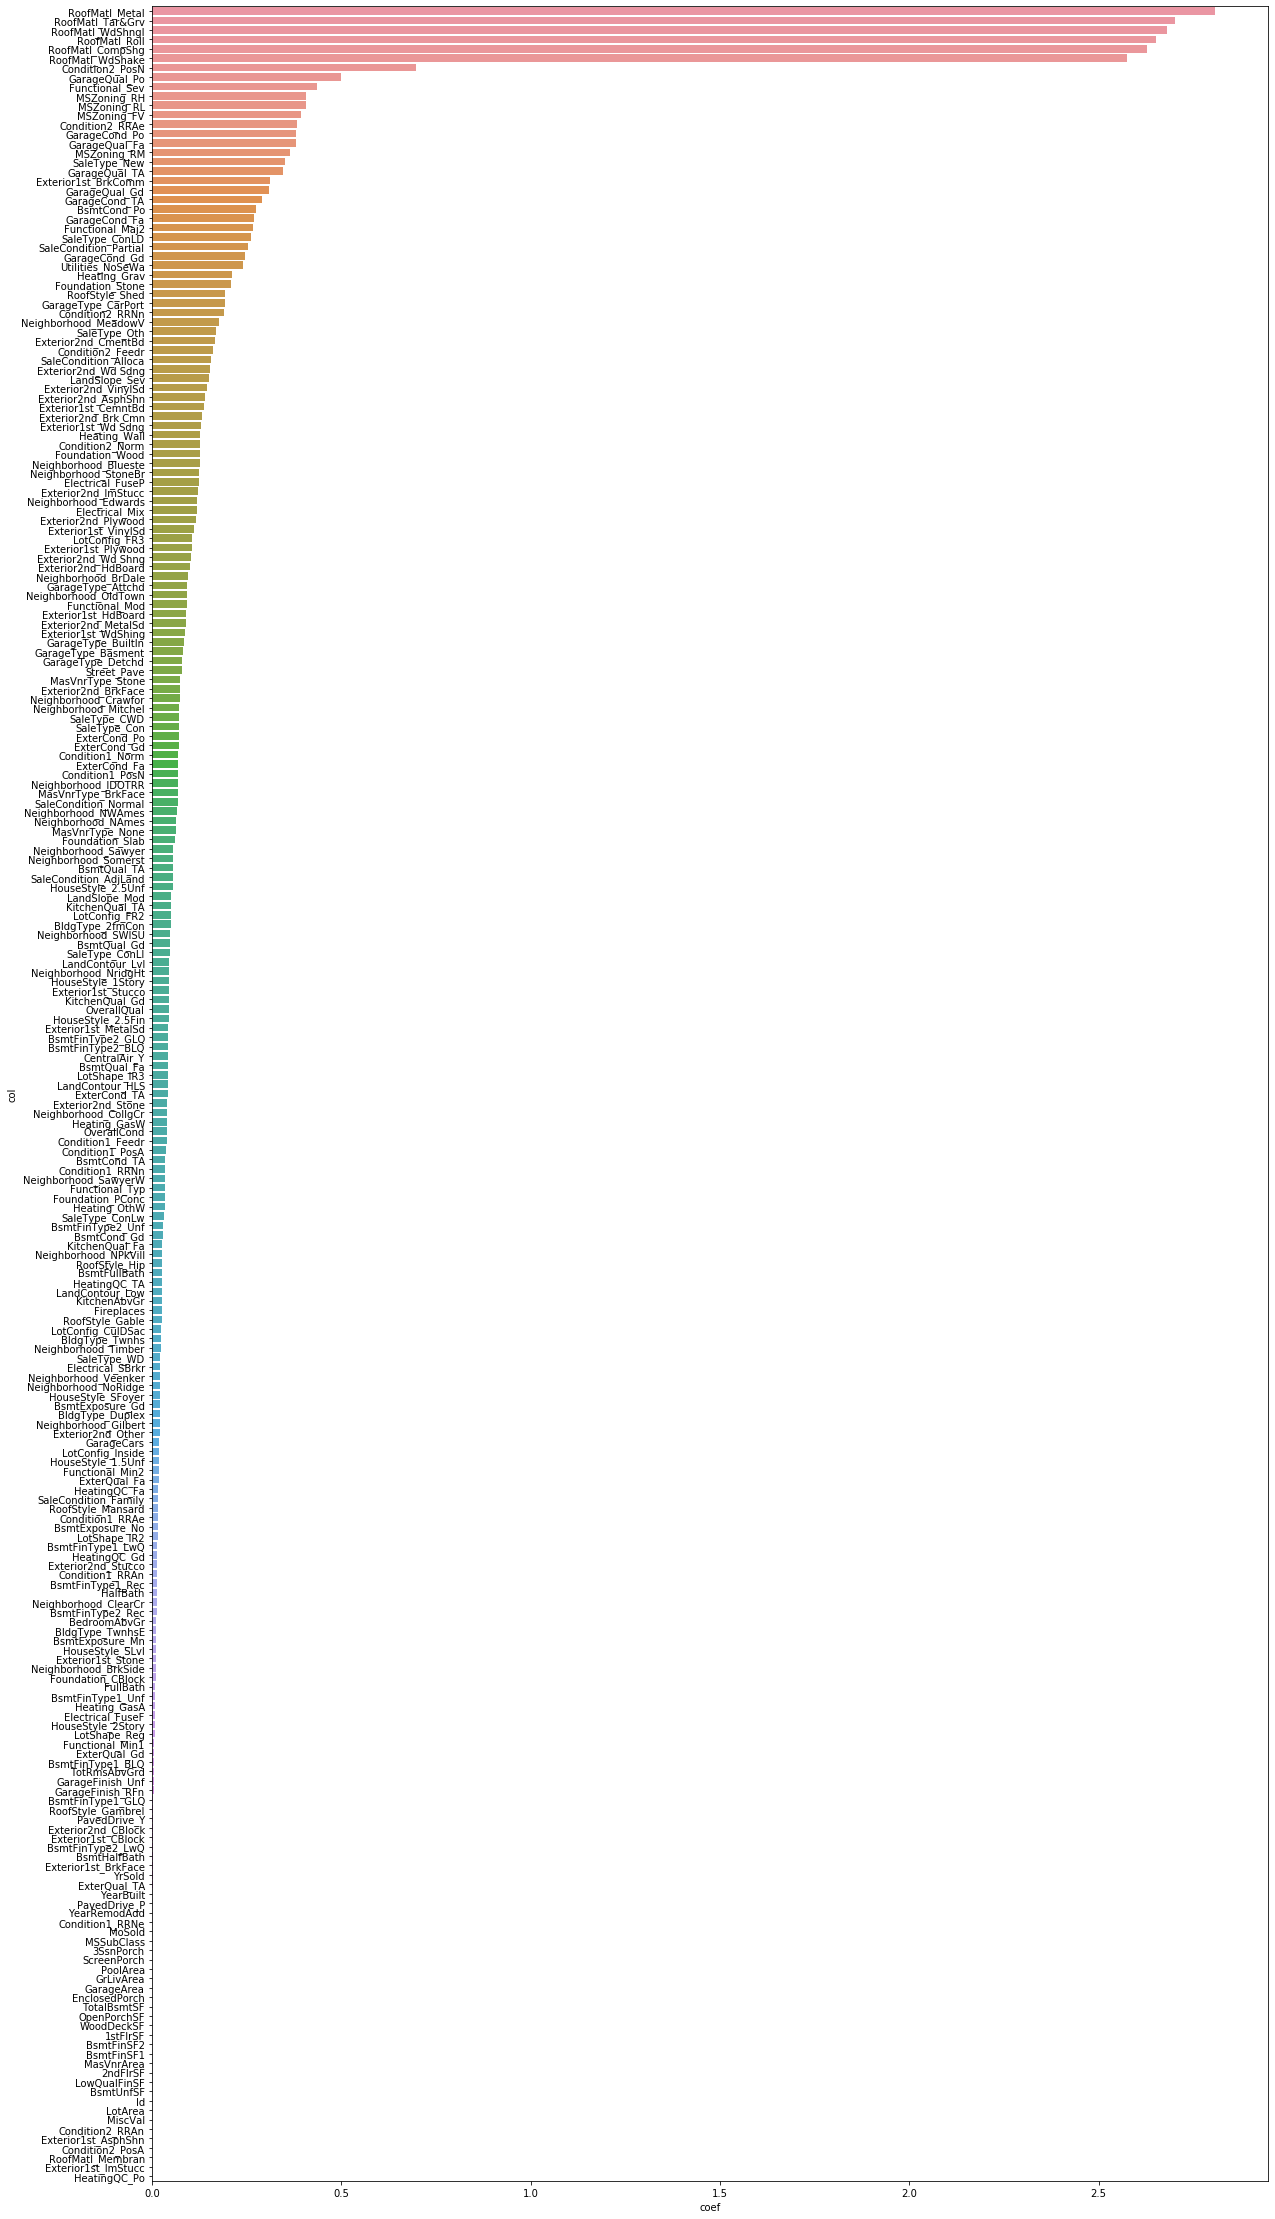

In [182]:
ols_coefs = pd.DataFrame({'col':X_train.columns,'coef':abs(ols.coef_)}).sort_values(by='coef',ascending=False)
ols_coefs
plt.rcParams['figure.figsize'] = [20, 40]
sns.barplot(x=ols_coefs['coef'],y=ols_coefs['col'])

Dominant features are roof material, MS Zoning, garage qual.

# Penalized Linear Regression

In [183]:
#Use elastic net, which is a mix of ridge and lasso

#just guess alpha and l1_ratio
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
enet.fit(X_train, y_train)

#Predictions
train_predict = enet.predict(X_train)
test_predict = enet.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test

#score is Rsquared
print("train score:",enet.score(X_train, y_train))
print("train RSS:",np.sum(train_res)**2)
print("test score:",enet.score(X_test, y_test))
print("test RSS:",np.sum(test_res)**2)



train score: 0.8115824039109173
train RSS: 4.386196006217282e-24
test score: 0.8565584090174787
test RSS: 0.5807930070444167


Now try to interate through the different alpha and rho.

In [184]:
N_alpha = 100
N_rho   = 10
params_df = pd.DataFrame(columns=['alpha','rho','score'])

alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            enet.set_params(alpha=alpha, l1_ratio=rho, normalize=False)
            enet.fit(X_train, y_train)
            score = enet.score(X_test,y_test) 
            df2 = pd.DataFrame(data=[[alpha,rho,score]] ,columns=['alpha','rho','score'])
            params_df = params_df.append(df2)

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128455947532985, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128455916686515, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128455885837319, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128459479269461, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128459407995411, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128459336706885, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128467637930851, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128467473200319, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128467308392617, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128486484921211, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1284861039551615, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128485722577398, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128530020847596, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128529138546577, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128528254049213, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1286305781969, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1286285281950805, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128626466477867, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128862792699425, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128857994691384, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128853134095502, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.12939878963631, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.129387386160341, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.12937564864904, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective d

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.130634978360444, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.130607290886908, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.130578153573674, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.133481064732827, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.133408649705118, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.133336512082556, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.140011725231408, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.139842188679408, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.139640243803767, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.154908863384566, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.154433539354165, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.153713417276148, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.188176602173513, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.185831252016883, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1788751372525095, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.253484371044901, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.25179209180882, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.239596139708364, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.400212274929431, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.295069808015761, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.38182503404111, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.701883033712625, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.45675051100604, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13715383026754857, tolerance: 0.018315343377855245
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

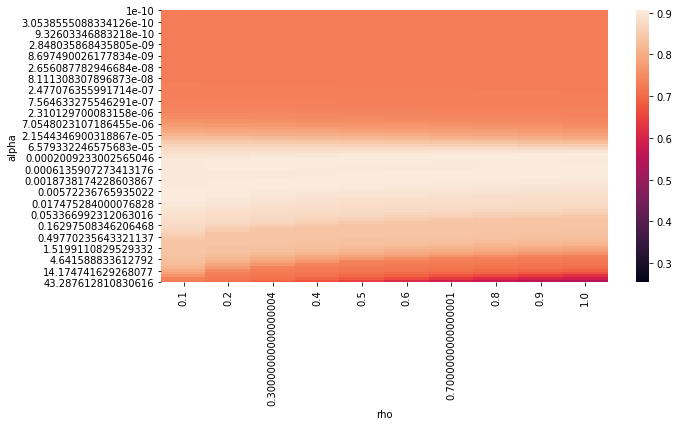

In [185]:
heatmap_data = params_df.pivot(index='alpha',columns='rho',values='score')

plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(heatmap_data)

#redo with test set as the true metric.

Penalized Linear Regression does not have any benefit. The preferred alpha is basically 0. This means that the original model was not really over-fitting. Its just the best the model can do given the noise in data.

In [186]:
params_df.loc[params_df['score']==max(params_df['score'])]
ols_constrained_best_score = max(params_df['score'])
best_alpha = params_df.loc[params_df['score']==max(params_df['score'])]['alpha'].iloc[0]
best_rho = params_df.loc[params_df['score']==max(params_df['score'])]['rho'].iloc[0]




refit linear model score 0.9058002049781245


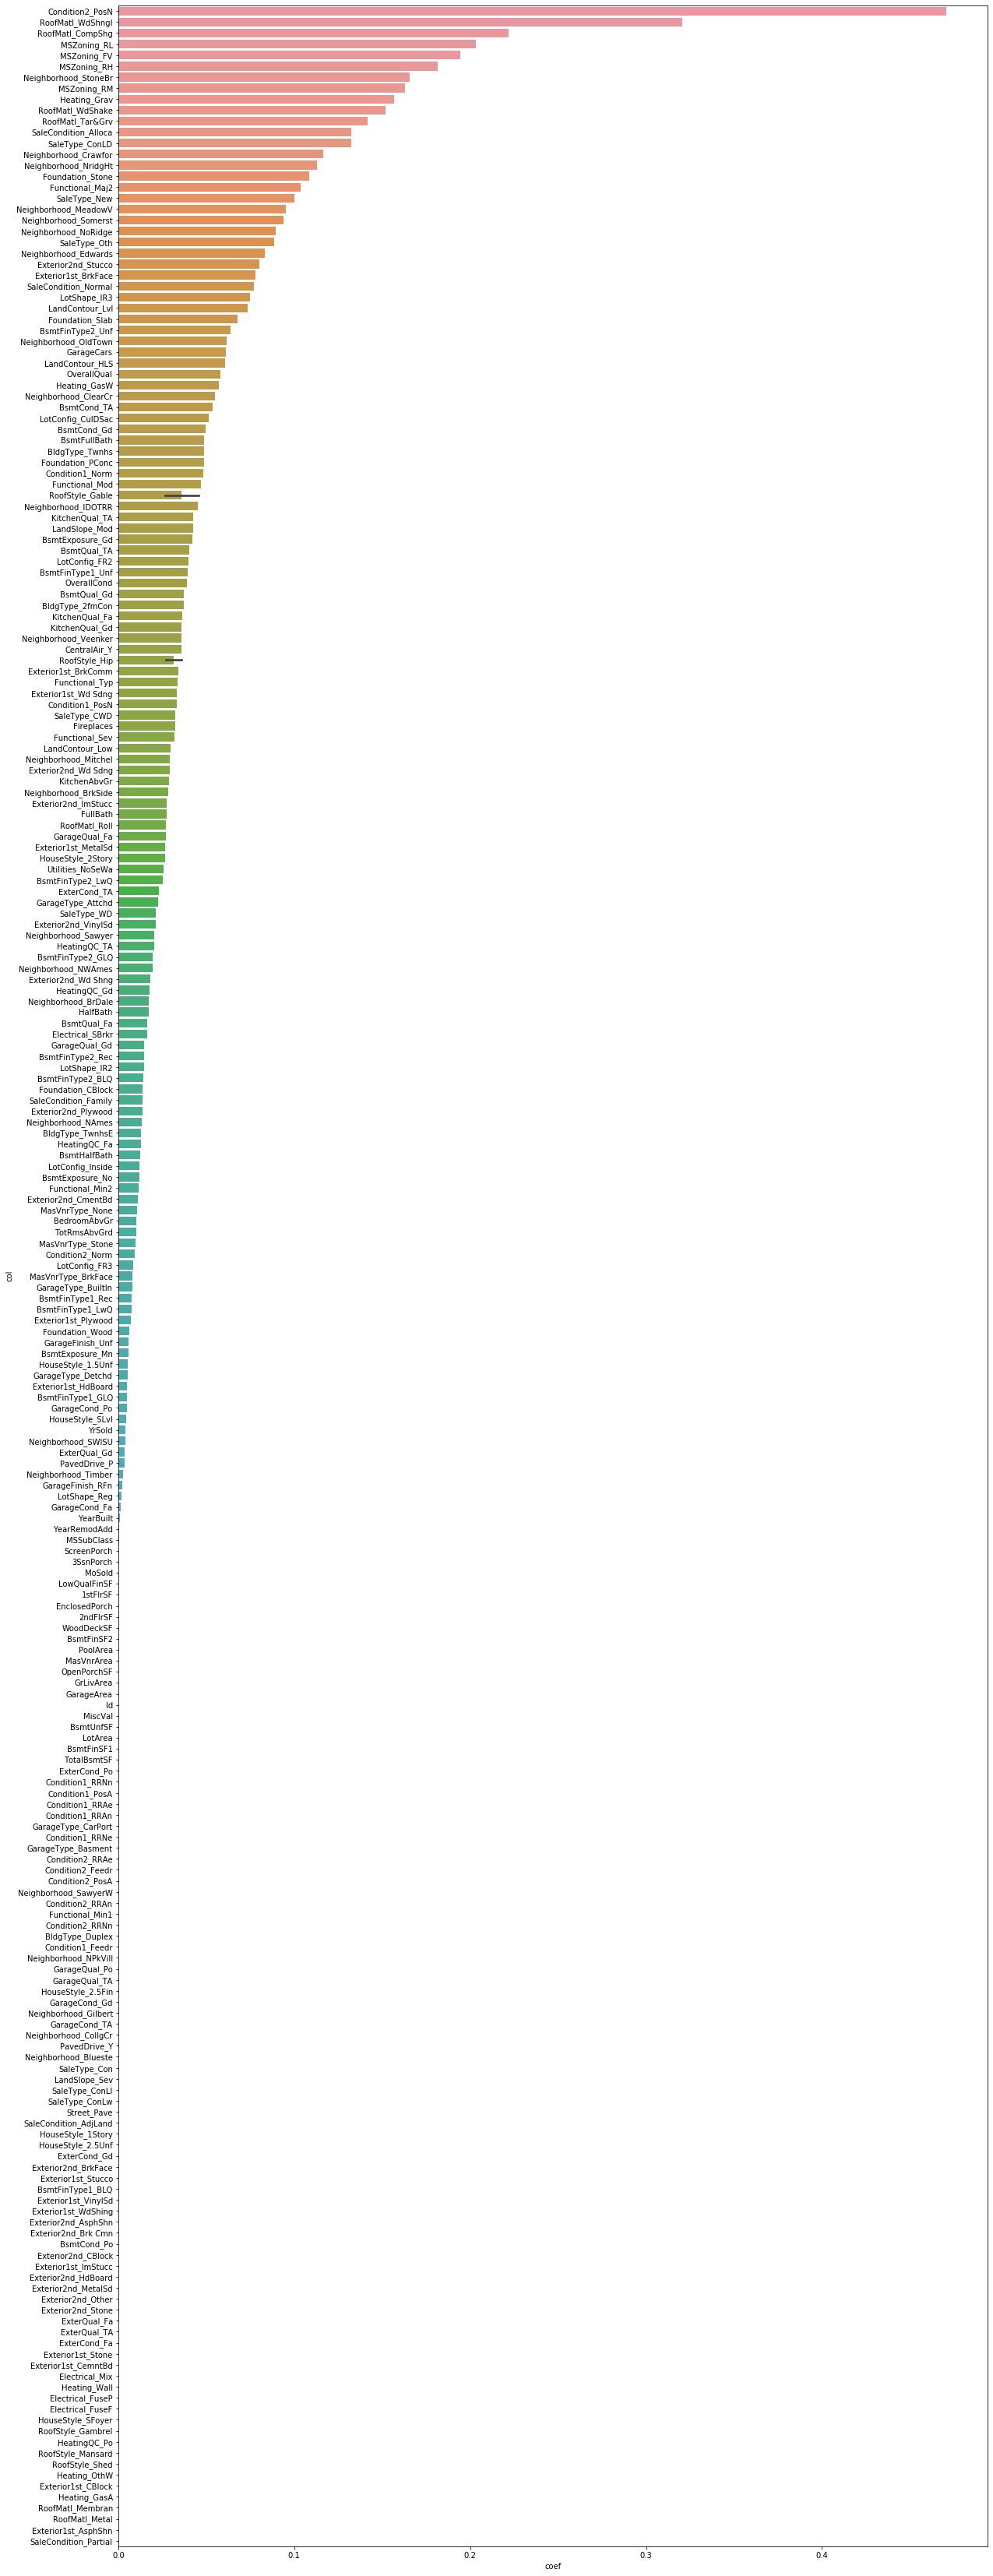

In [187]:
#refit

enet_opt = ElasticNet(alpha=best_alpha, l1_ratio=best_rho, normalize=False)
enet_opt.fit(X_train, y_train)

enet_refit_score = enet_opt.score(X_test, y_test)
print("refit linear model score",enet_refit_score)

enet_opt_coefs = pd.DataFrame({'col':X_train.columns,'coef':abs(enet_opt.coef_),'coef_raw':enet_opt.coef_}).sort_values(by='coef',ascending=False)
plt.rcParams['figure.figsize'] = [20, 60]
sns.barplot(x=enet_opt_coefs['coef'],y=enet_opt_coefs['col'])

In [621]:
enet_opt_coefs.loc[enet_opt_coefs['col'].isin(['BedroomAbvGr','YrSold','MSZoning_RL','OverallQual','GrLivArea'])]

#MSZoning_RL is residential Low Density


,col,coef,coef_raw
37,MSZoning_RL,0.203306,0.203306
3,OverallQual,0.058057,0.058057
20,BedroomAbvGr,0.010432,0.010432
34,YrSold,0.004103,-0.004103
15,GrLivArea,0.000018,0.000018


# Random Forest

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [189]:
#fit the tree and score
tree_model = RandomForestRegressor(oob_score = True, n_estimators=100)
tree_model.get_params()


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [190]:
tree_model.fit(X_train,y_train)
print("train score:",tree_model.score(X_train, y_train))
print("train oob score:",tree_model.oob_score_)
print("test score:", tree_model.score(X_test,y_test))


train score: 0.9809478023579721
train oob score: 0.8601469608069605
test score: 0.884353295792455


In [191]:
train_predict = tree_model.predict(X_train)
test_predict = tree_model.predict(X_test)

train_res = train_predict - y_train
test_res = test_predict - y_test

train std: 0.054845119248241966
train mean: -0.00042567973159692485


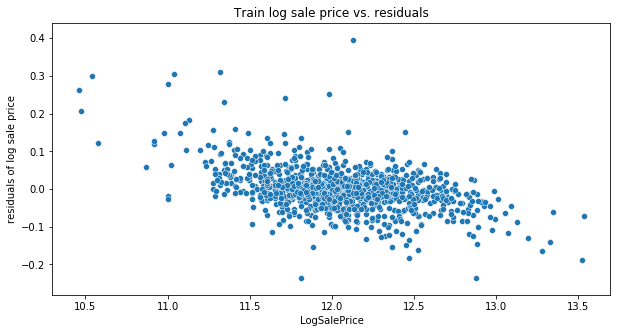

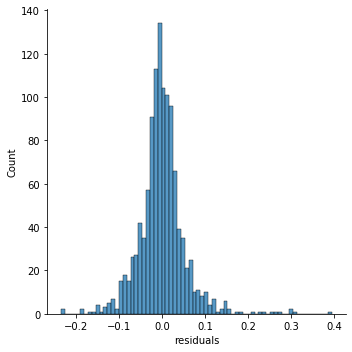

In [192]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.ylabel("residuals of log sale price")
plt.title("Train log sale price vs. residuals")
sns.scatterplot(x=y_train, y = train_res)

g=sns.displot(train_res)
g.set_axis_labels("residuals")
print("train std:",train_res.std())
print("train mean:",train_res.mean())


train std: 0.13861693778789944
train mean: 0.005275242071595573


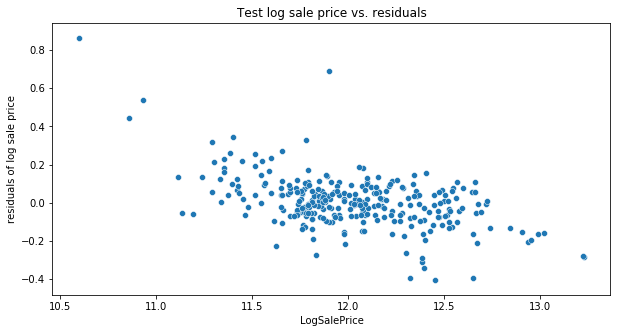

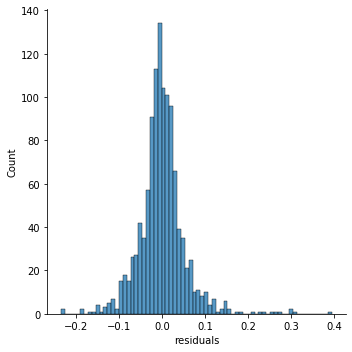

In [193]:
plt.ylabel("residuals of log sale price")
plt.title("Test log sale price vs. residuals")
sns.scatterplot(x=y_test, y = test_res)
g = sns.displot(train_res)
g.set_axis_labels("residuals")
print("train std:",test_res.std())
print("train mean:",test_res.mean())

Try to fine-tune the Random Forest model

In [194]:
tree_params = [{
    
    "n_estimators":range(85,125),
    'min_samples_split': range(2,5),
}]
grid_search_tree = GridSearchCV(tree_model, tree_params, cv=5, n_jobs=-1)
%time grid_search_tree.fit(X_train, y_train)

CPU times: user 4.92 s, sys: 389 ms, total: 5.31 s
Wall time: 3min 38s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'min_samples_split': range(2, 5),
  

In [195]:
print("best params:",grid_search_tree.best_params_)
print("best score:",grid_search_tree.best_score_)
tree_best_score = grid_search_tree.best_score_;

best params: {'min_samples_split': 2, 'n_estimators': 118}
best score: 0.8608417307508224


In [224]:
tree_model_opt = RandomForestRegressor(oob_score = True, min_samples_split = 2, n_estimators=118)
tree_model_opt.fit(X_train,y_train)
tree_model_opt_train_score = tree_model_opt.score(X_train,y_train)
tree_model_opt_test_score = tree_model_opt.score(X_test,y_test)

print("refit train score", tree_model_opt_train_score)
print("refit test score", tree_model_opt_test_score)

refit train score 0.9804364706029824
refit test score 0.8844183315177256


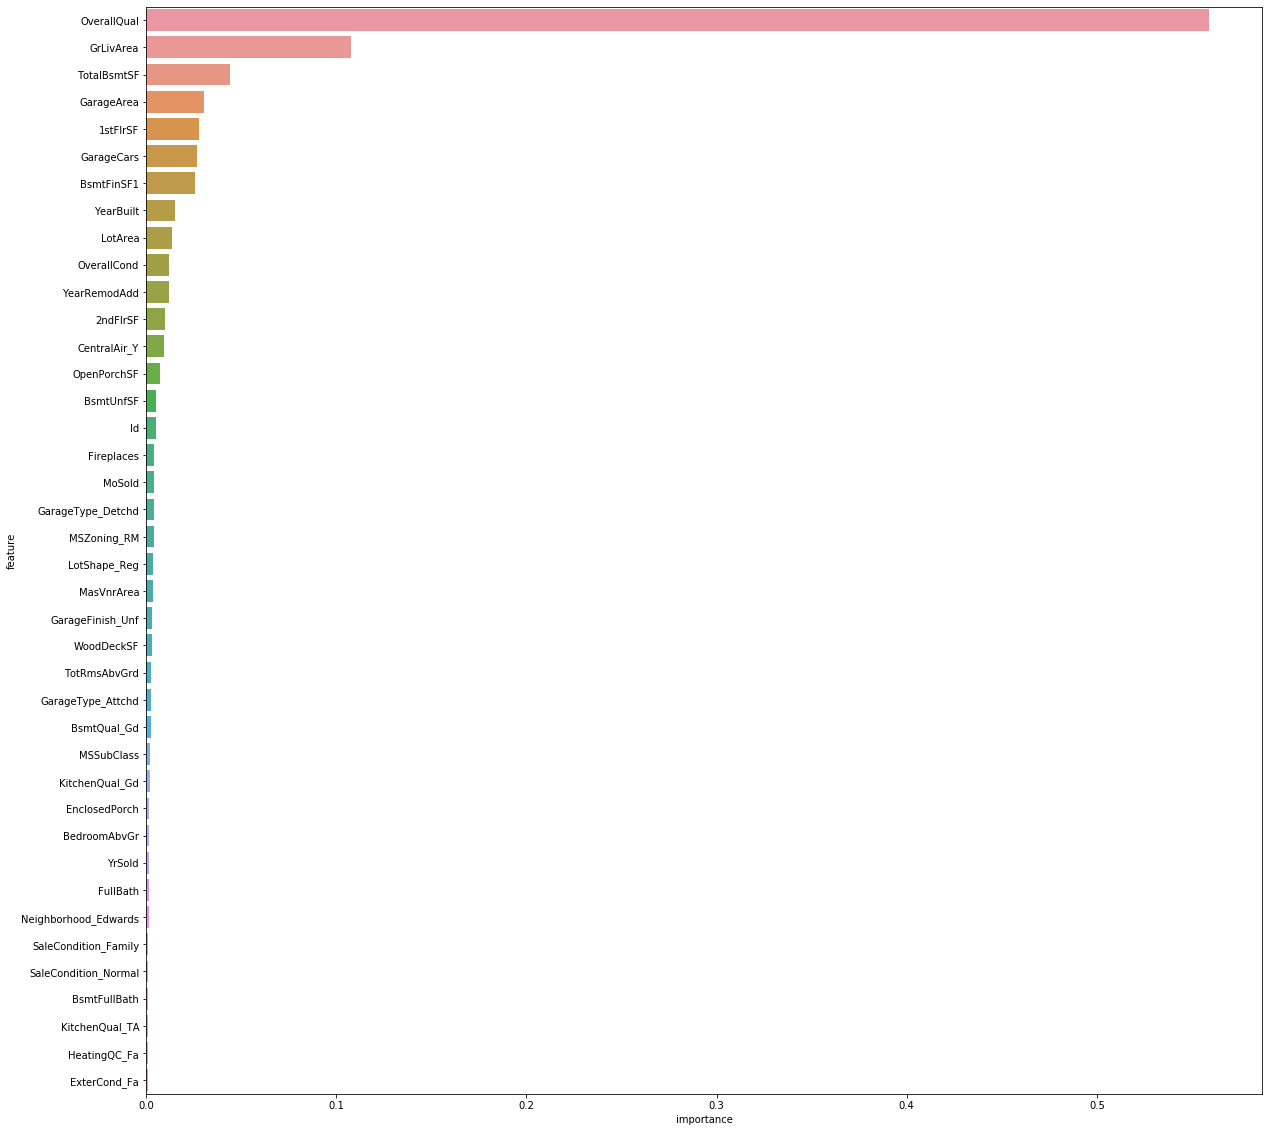

In [196]:
tree_model_params = pd.DataFrame({'feature':X_train.columns,'importance':tree_model.feature_importances_}).sort_values(by='importance',ascending=False)
tree_model_params[:10]
plt.rcParams['figure.figsize'] = [20, 20]
filter=40
sns.barplot(x=tree_model_params['importance'][:filter],y=tree_model_params['feature'][:filter])



In [223]:
#score summaries

print('linear train score',ols_train_score)
print('linear test score',ols_test_score)
print('constrained linear best',max(params_df['score']))
print("refit linear model score",enet_refit_score)
print('tree grid search best score',tree_best_score)
print("tree refit train score", tree_model_opt_train_score)
print("tree refit test score", tree_model_opt_test_score)

linear train score 0.9440005826017565
linear test score 0.7289562293083478
constrained linear best 0.9058002049781245
refit linear model score 0.9058002049781245
tree grid search best score 0.8608417307508224
tree refit train score 0.9798092507454218
tree refit test score 0.8853172279025696


# Skewing Parameters

Take sample rows and skew key parameters to see how price can change.

Best score is penalized linear but the params coefs and pareto keep changing based on sampling.So I will use Random Forest.

## Skewing OverallQual

In [578]:

#get the raw data again because need neighborhood not 1-hot encoded
train_data_raw = pd.read_csv("data/train.csv")
OverallQual_skew_df = pd.DataFrame()

#make the base case
OverallQual_skew_df['Id']=X_train['Id']
OverallQual_skew_df['bedroom']=X_train['BedroomAbvGr']
OverallQual_skew_df['Case']="OverallQual+0 (base)"
OverallQual_skew_df['OverallQual']=X_train['OverallQual']
OverallQual_skew_df['LogSalePrice']=y_train
OverallQual_skew_df=pd.merge(OverallQual_skew_df,train_data_raw[['Id','Neighborhood']],how='inner', on='Id')

#Maximum overallqual is 10. So only choose rows with qual no greater than 7 to prevent going over.
UCL=7
OverallQual_skew_df=OverallQual_skew_df.loc[OverallQual_skew_df['OverallQual']<UCL]
append_df_base = OverallQual_skew_df.copy()

#OverallQual+1
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=1


append_df['Case']='OverallQual+1'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()

#OverallQual+2
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=2


append_df['Case']='OverallQual+2'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()


#OverallQual+3
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=3

append_df['Case']='OverallQual+3'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()


#OverallQual+4
append_df= append_df_base.copy()
X_train_skew = X_train.loc[X_train['OverallQual']<UCL].copy()
X_train_skew["OverallQual"]+=4

append_df['Case']='OverallQual+4'
append_df.drop('OverallQual',axis=1,inplace=True)
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','OverallQual']], on='Id')
predict_df = pd.DataFrame({"Id":X_train_skew['Id'], 'LogSalePrice':tree_model_opt.predict(X_train_skew)})
append_df=pd.merge(append_df, predict_df, on='Id')

OverallQual_skew_df = OverallQual_skew_df.append(append_df, sort=True).copy()

OverallQual_skew_df['SalePrice']=[math.exp(x) for x in OverallQual_skew_df['LogSalePrice']]



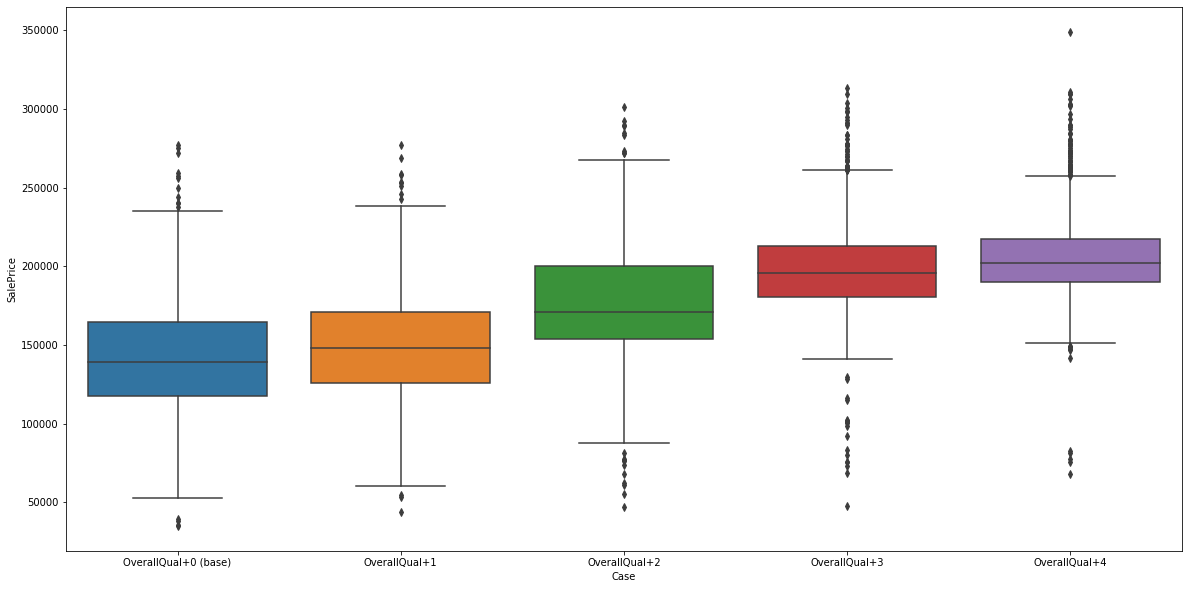

In [579]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=OverallQual_skew_df,x='Case', y = 'SalePrice')

In [580]:
OverallQual_skew_df.groupby('Case').mean()[['LogSalePrice','SalePrice']]


,LogSalePrice,SalePrice
Case,,
OverallQual+0 (base),11.818892,141050.440329
OverallQual+1,11.887792,149906.699729
OverallQual+2,12.040758,174491.242528
OverallQual+3,12.174640,197215.805781
OverallQual+4,12.227732,206603.814555


Increasing qual by 1 can raise price by $8,856.

Increase by 1 more (+2 total), gain another $24,585.

Increase by 1 more (+3 total), gain another $22,724.

Increase by 1 more (+4 total), gain another $9,388.

In [581]:
OverallQual_skew_df.groupby('Case').std()[['LogSalePrice','SalePrice']]

,LogSalePrice,SalePrice
Case,,
OverallQual+0 (base),0.285555,37500.813017
OverallQual+1,0.250771,35817.941993
OverallQual+2,0.249996,39810.973835
OverallQual+3,0.195081,34900.875315
OverallQual+4,0.151094,29840.575264


In [582]:
pd.options.display.max_rows = 1000
OverallQual_skew_df.groupby(['Neighborhood','Case']).mean()[['LogSalePrice','SalePrice']]

LogSalePrice      SalePrice
Neighborhood Case                                             
Blueste      OverallQual+0 (base)  11.728037     124000.000000
             OverallQual+1         11.999110     162610.081653
             OverallQual+2         12.046170     170445.334876
             OverallQual+3         12.120817     183655.506432
             OverallQual+4         12.120817     183655.506432
BrDale       OverallQual+0 (base)  11.557736     105384.615385
             OverallQual+1         11.825084     137189.155743
             OverallQual+2         12.001843     163354.366968
             OverallQual+3         12.093170     178734.771960
             OverallQual+4         12.114300     182509.723729
BrkSide      OverallQual+0 (base)  11.689289     125931.097561
             OverallQual+1         11.725825     128768.151081
             OverallQual+2         11.862226     148252.120213
             OverallQual+3         12.032650     173450.619342
             OverallQual+4         12.108730     185158.415829
ClearCr      OverallQual+0 (base)  12.154852     194154.315789
             OverallQual+1         12.151291     192708.325117
             OverallQual+2         12.269108     215619.728228
             OverallQual+3         12.353770     233953.511550
             OverallQual+4         12.381818     240118.531307
CollgCr      OverallQual+0 (base)  11.919374     152765.627907
             OverallQual+1         11.961208     159265.079331
             OverallQual+2         12.096084     181159.527918
             OverallQual+3         12.208646     201496.954533
             OverallQual+4         12.240321     207615.109749
Crawfor      OverallQual+0 (base)  12.075461     180938.565217
             OverallQual+1         12.062875     178563.161752
             OverallQual+2         12.220416     207319.761234
             OverallQual+3         12.312549     225759.950445
             OverallQual+4         12.340084     231587.771479
Edwards      OverallQual+0 (base)  11.679704     123070.933333
             OverallQual+1         11.772881     133431.387743
             OverallQual+2         11.933653     156867.634423
             OverallQual+3         12.080716     180048.157380
             OverallQual+4         12.172911     195126.870733
Gilbert      OverallQual+0 (base)  12.089476     178769.258065
             OverallQual+1         12.112778     183408.294795
             OverallQual+2         12.206868     201304.453799
             OverallQual+3         12.265275     212860.747726
             OverallQual+4         12.275996     214963.046984
IDOTRR       OverallQual+0 (base)  11.446022     99345.964286 
             OverallQual+1         11.605003     113201.828960
             OverallQual+2         11.750552     132155.502068
             OverallQual+3         11.973169     161536.298031
             OverallQual+4         12.078505     178339.593978
MeadowV      OverallQual+0 (base)  11.480033     99261.538462 
             OverallQual+1         11.618055     115286.731058
             OverallQual+2         11.716488     128429.845790
             OverallQual+3         11.991793     163594.904314
             OverallQual+4         12.083916     178439.641712
Mitchel      OverallQual+0 (base)  11.889566     147850.000000
             OverallQual+1         11.953534     157524.323473
             OverallQual+2         12.126650     186698.724809
             OverallQual+3         12.245303     209812.572002
             OverallQual+4         12.281044     217146.139078
NAmes        OverallQual+0 (base)  11.840795     141004.215116
             OverallQual+1         11.896717     149230.198335
             OverallQual+2         12.064234     177107.181319
             OverallQual+3         12.203335     201992.017163
             OverallQual+4         12.257419     212065.464186
NPkVill      OverallQual+0 (base)  11.866477     142694.444444
             OverallQual+1         12.020530     166164.438908
   

# Skew GrLivArea

In [583]:

GrLivArea_skew_df = X_train[['Id','GrLivArea']].sort_values(by='Id').copy()
GrLivArea_skew_df['Case']='GrLivArea_x1'
GrLivArea_skew_df['LogSalePrice'] = y_train
GrLivArea_skew_df = pd.merge(GrLivArea_skew_df,train_data_raw[['Id','Neighborhood']],how='inner', on='Id')


append_df_base = GrLivArea_skew_df.copy()
X_train_skew_base = X_train.sort_values(by='Id').copy()

#increase area by 25%
X_train_skew = X_train_skew_base.copy()
X_train_skew['GrLivArea']*=1.25
append_df = append_df_base.copy()

append_df.drop('GrLivArea',axis=1,inplace=True)
append_df=pd.merge(append_df, X_train_skew[['Id','GrLivArea']], on='Id')

append_df['Case'] = "GrLivArea_x1.25"
prediction_df =pd.DataFrame({"Id":X_train_skew['Id'],"LogSalePrice":tree_model_opt.predict(X_train_skew) })
append_df.drop('LogSalePrice',axis=1,inplace=True)
append_df=pd.merge(append_df, prediction_df, on='Id')

GrLivArea_skew_df = GrLivArea_skew_df.append(append_df, sort=True).copy()
GrLivArea_skew_df['SalePrice']=[math.exp(x) for x in GrLivArea_skew_df['LogSalePrice']]

GrLivArea_skew_df

,Case,GrLivArea,Id,LogSalePrice,Neighborhood,SalePrice
0,GrLivArea_x1,1710.00,1,12.247694,CollgCr,208500.000000
1,GrLivArea_x1,1262.00,2,12.109011,Veenker,181500.000000
2,GrLivArea_x1,1786.00,3,12.317167,CollgCr,223500.000000
3,GrLivArea_x1,1717.00,4,11.849398,Crawfor,140000.000000
4,GrLivArea_x1,2198.00,5,12.429216,NoRidge,250000.000000
...,...,...,...,...,...,...
1156,GrLivArea_x1.25,1425.00,1454,11.809371,Mitchel,134506.911951
1157,GrLivArea_x1.25,1526.25,1455,12.181258,Somerst,195098.054294
1158,GrLivArea_x1.25,2591.25,1457,12.214467,NWAmes,201685.856431
1159,GrLivArea_x1.25,2925.00,1458,12.462803,Crawfor,258539.238707


In [584]:
GrLivArea_skew_df

,Case,GrLivArea,Id,LogSalePrice,Neighborhood,SalePrice
0,GrLivArea_x1,1710.00,1,12.247694,CollgCr,208500.000000
1,GrLivArea_x1,1262.00,2,12.109011,Veenker,181500.000000
2,GrLivArea_x1,1786.00,3,12.317167,CollgCr,223500.000000
3,GrLivArea_x1,1717.00,4,11.849398,Crawfor,140000.000000
4,GrLivArea_x1,2198.00,5,12.429216,NoRidge,250000.000000
...,...,...,...,...,...,...
1156,GrLivArea_x1.25,1425.00,1454,11.809371,Mitchel,134506.911951
1157,GrLivArea_x1.25,1526.25,1455,12.181258,Somerst,195098.054294
1158,GrLivArea_x1.25,2591.25,1457,12.214467,NWAmes,201685.856431
1159,GrLivArea_x1.25,2925.00,1458,12.462803,Crawfor,258539.238707


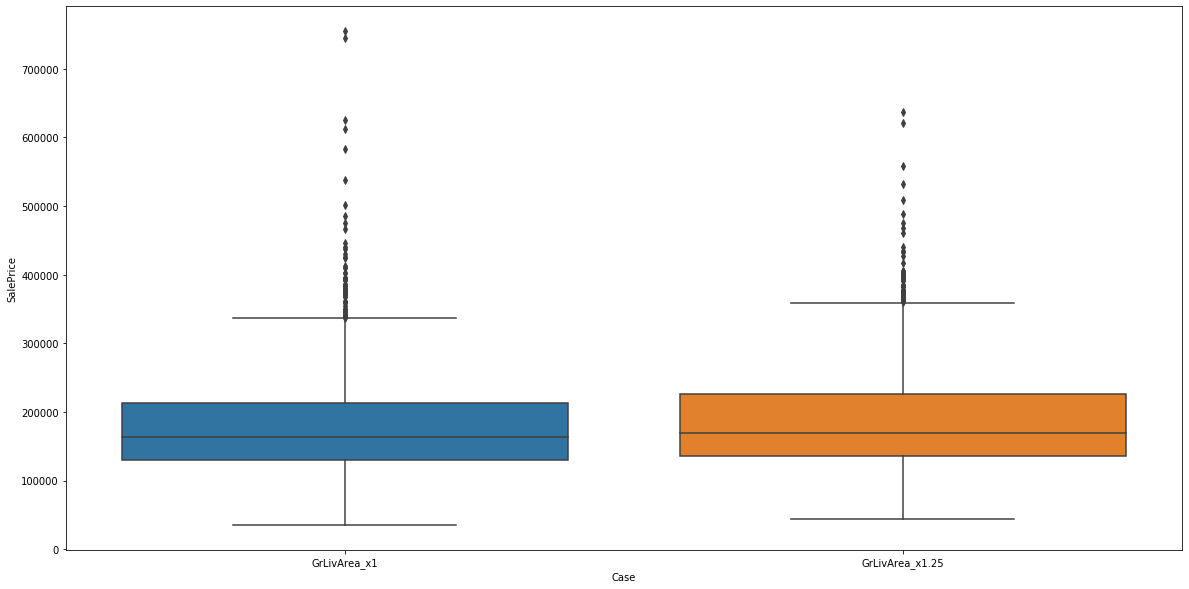

In [585]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=GrLivArea_skew_df,x='Case', y = 'SalePrice')

In [586]:
base_case=GrLivArea_skew_df.loc[GrLivArea_skew_df['Case']=="GrLivArea_x1"]
skew_case=GrLivArea_skew_df.loc[GrLivArea_skew_df['Case']=="GrLivArea_x1.25"]

merged_cases = pd.merge(base_case,skew_case, on='Id',suffixes = ['_base','_skew'])

merged_cases['price_change'] = merged_cases['SalePrice_skew'] - merged_cases['SalePrice_base']
merged_cases['area_change'] = merged_cases['GrLivArea_skew'] - merged_cases['GrLivArea_base']
merged_cases['price_per_area_change'] = merged_cases['price_change'] / merged_cases['area_change']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

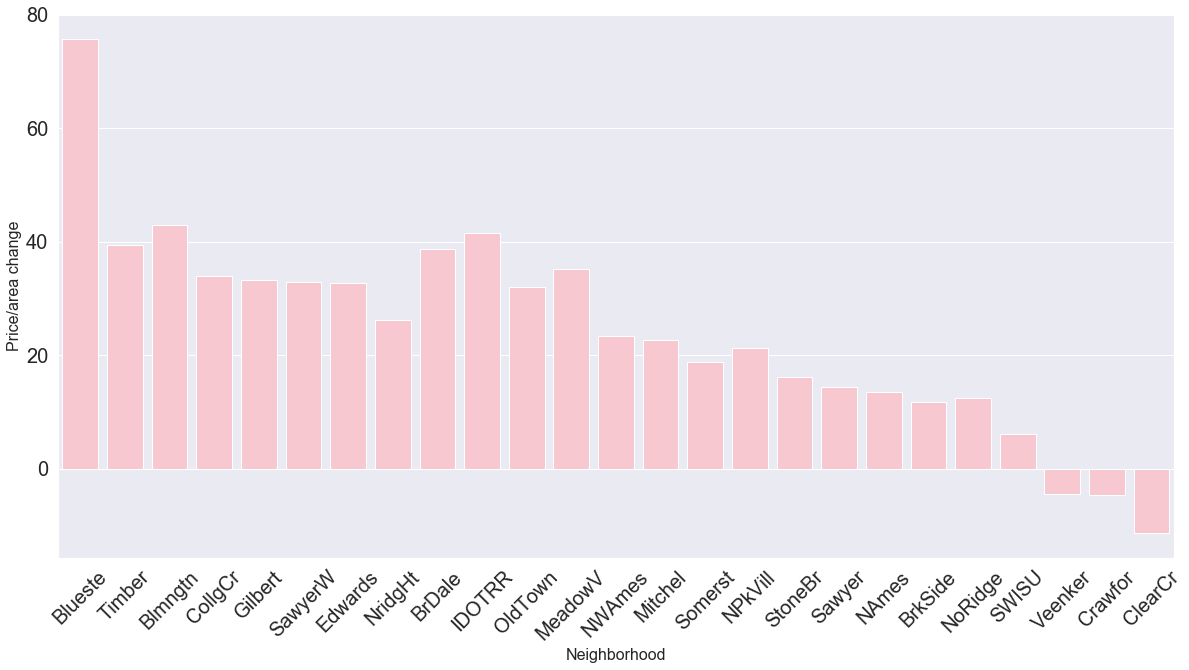

In [666]:
plt.rcParams['figure.figsize'] = [20, 10]
merged_stats = merged_cases.groupby('Neighborhood_base').mean().sort_values(by='price_change',ascending=False)
sns.barplot(data=merged_stats,x=merged_stats.index,y='price_per_area_change',color='pink')
plt.ylabel('Price/area change', fontsize=16)
plt.yticks(fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=45, fontsize=20)

In [599]:
neg_price_change = merged_cases.loc[merged_cases['price_change']<0] #292 cases less than 0 price change

print("fraciton negative:", len(neg_price_change)/len(merged_cases))
neg_price_change.groupby("Neighborhood_base").count()['Id']

fraciton negative: 0.25150732127476316


Neighborhood_base
Blmngtn    1 
BrDale     1 
BrkSide    18
ClearCr    16
CollgCr    21
Crawfor    25
Edwards    13
Gilbert    9 
IDOTRR     5 
MeadowV    1 
Mitchel    11
NAmes      50
NPkVill    1 
NWAmes     15
NoRidge    12
NridgHt    15
OldTown    12
SWISU      9 
Sawyer     17
SawyerW    6 
Somerst    18
StoneBr    6 
Timber     4 
Veenker    6 
Name: Id, dtype: int64

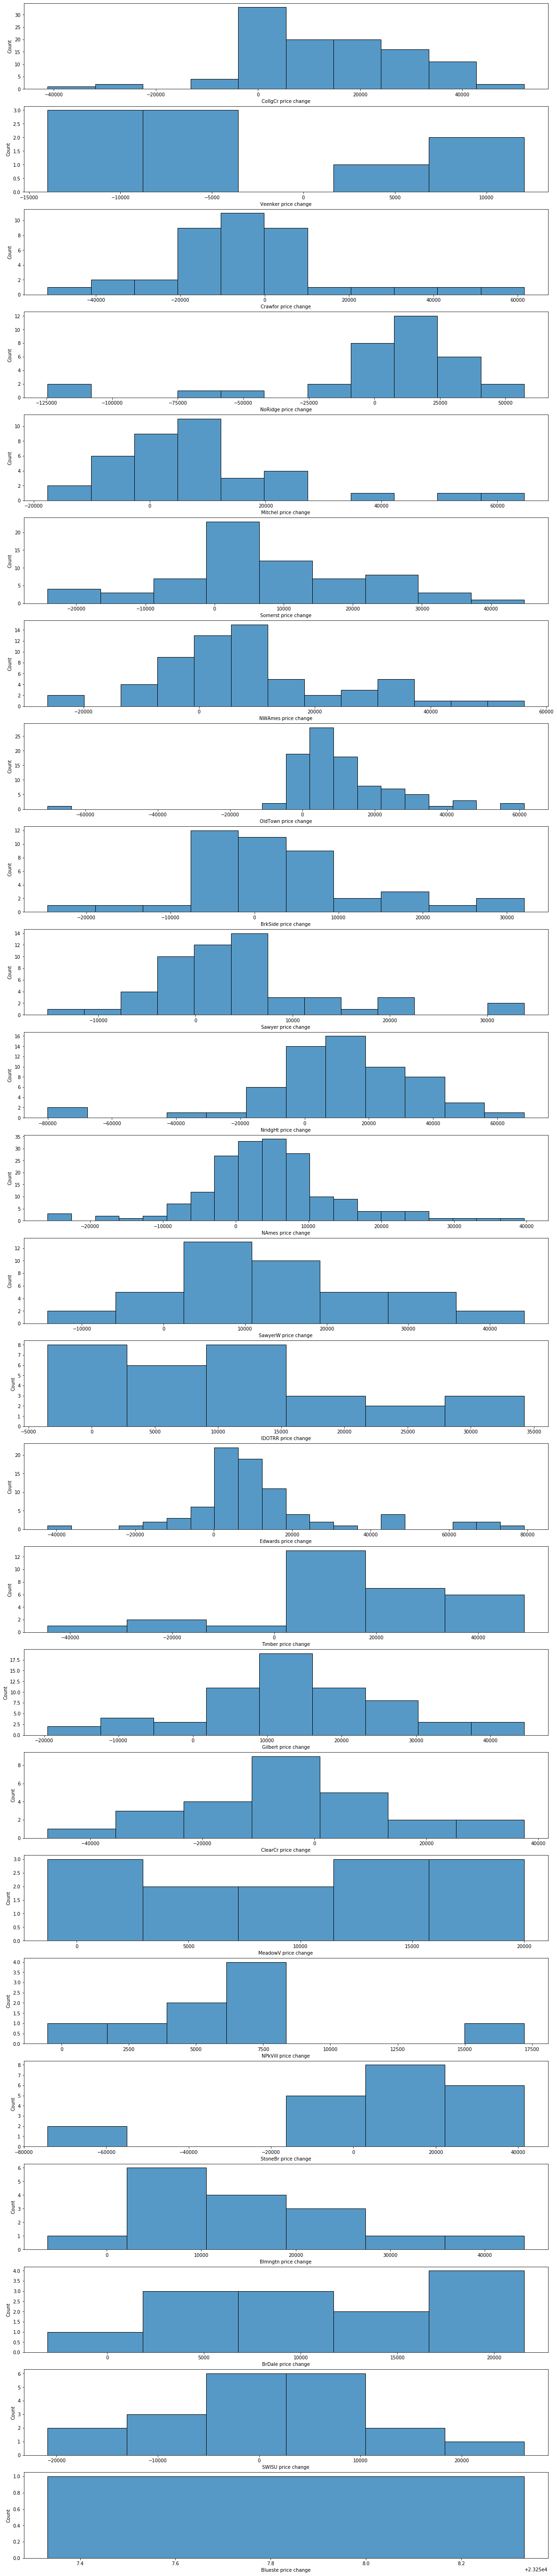

In [641]:
plt.rcParams['figure.figsize'] = [20, 100]
n_hoods = len(merged_cases['Neighborhood_base'].unique())

fig,axes = plt.subplots(n_hoods,1)
i=0
for hood in merged_cases['Neighborhood_base'].unique():
    axes[i].set_xlabel(hood+' price change')
    sns.histplot(data=merged_cases.loc[merged_cases['Neighborhood_base']==hood], x ='price_change', ax = axes[i])
    i+=1

In [647]:
merged_stats.index

Index(['Blueste', 'Timber', 'Blmngtn', 'CollgCr', 'Gilbert', 'SawyerW',
       'Edwards', 'NridgHt', 'BrDale', 'IDOTRR', 'OldTown', 'MeadowV',
       'NWAmes', 'Mitchel', 'Somerst', 'NPkVill', 'StoneBr', 'Sawyer', 'NAmes',
       'BrkSide', 'NoRidge', 'SWISU', 'Veenker', 'Crawfor', 'ClearCr'],
      dtype='object', name='Neighborhood_base')